In [8]:
#Declaração das funções para rodar o algoritmo

import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio


#Sobel Img Edge Detection
def edgeImg(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelX = cv2.Sobel(gray,cv2.CV_64F,1,0)
    sobelY = cv2.Sobel(gray,cv2.CV_64F,0,1)

    return np.sqrt(np.power(sobelX,2) + np.power(sobelY,2))

#use dynamic programming to find Min Energy Path
def calculateMinEnergyPath(energyImg):
    minEnergyPath = np.zeros(energyImg.shape)
    n = energyImg.shape[0]
    m = energyImg.shape[1]

    #base case on the last row of the matrix
    for j in range(0,m):
        minEnergyPath[n-1][j] = energyImg[n-1][j]

    #builds matrix from bottom up
    for i in range(n-2,-1,-1):
        for j in range(0,m):
            #just making sure we dont go out of bounds and finding the min
            left = max(0,j-1)
            right = min(m-1,j+1)
            

            minEnergyPath[i][j] = energyImg[i][j] + min(minEnergyPath[i+1][left:right+1])

    return minEnergyPath

def printMinSeam(img,minEnergyPath):
    n = minEnergyPath.shape[0]
    m = minEnergyPath.shape[1]
    
    minPos = 0
    minVal = minEnergyPath[0][0]

    #find Min Seam
    for i in range(1,m):
        if(minEnergyPath[0][i] < minVal):
            minPos = i
            minVal = minEnergyPath[0][i]

    printImg = np.array(img)
    printImg[0][minPos] = [255,0,0]
    for i in range(1,n):
        #find min from three down
        center = minPos
        min = minEnergyPath[i][center]

        if(center>0 and minEnergyPath[i][center-1] < min):
            min = minEnergyPath[i][center-1]
            minPos = center -1

        if(center<m-1 and minEnergyPath[i][center+1] < min):
            min = minEnergyPath[i][center+1]
            minPos = center+1


        printImg[i][minPos] = [255,0,0]
    
    plt.imshow(printImg)
    plt.show()
    return

def removeSeam(img,minEnergyPath):
    n = minEnergyPath.shape[0]
    m = minEnergyPath.shape[1]
    
    minPos = 0
    minVal = minEnergyPath[0][0]

    #find Min Seam
    for i in range(1,m):
        if(minEnergyPath[0][i] < minVal):
            minPos = i
            minVal = minEnergyPath[0][i]

    newImg = np.zeros((img.shape[0],img.shape[1]-1,img.shape[2]),dtype=np.uint8)

    newImg[0] = np.concatenate((img[0][0:minPos],img[0][minPos+1:img.shape[1]]))
    for i in range(1,n):
        #find min from three down
        center = minPos
        min = minEnergyPath[i][center]

        if(center>0 and minEnergyPath[i][center-1] < min):
            min = minEnergyPath[i][center-1]
            minPos = center -1

        if(center<m-1 and minEnergyPath[i][center+1] < min):
            min = minEnergyPath[i][center+1]
            minPos = center+1

        newImg[i] = np.concatenate((img[i][0:minPos],img[i][minPos+1:img.shape[1]]))
    
    return newImg

def removeNSeams(img,seamNumber):
    newImg = img
    for i in range(0,seamNumber):
        #print('removing Seam Number ', i)
        print ('removing seam ',i+1, ' of ', seamNumber, end="\r")
        newEP = calculateMinEnergyPath(edgeImg(newImg))
        newImg = removeSeam(newImg,newEP)


    return newImg

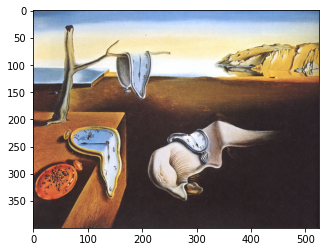

In [15]:
#primeira demonstração com a imagem Persistence of Memory

img = imageio.imread('imgs/persistenceLowRes.jpg')

plt.imshow(img)
plt.show()

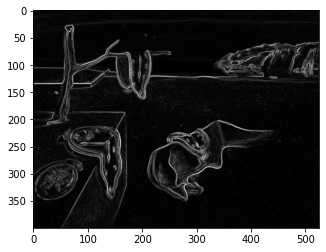

In [16]:
#o algoritmo ira calcular algumas questões da imagem, entre elas, sera feita uma detecção de bordas

edgedImg = edgeImg(img)

plt.imshow(edgedImg, cmap='gray')
plt.show()

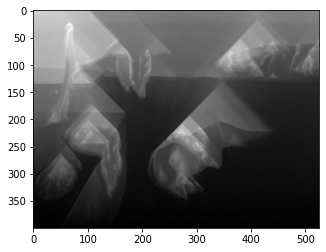

In [18]:
#a partir destas bordas ele faz o calculo utilizando programação dinamica de quais seams tem o menor peso

minEnergyPath = calculateMinEnergyPath(edgedImg)

plt.imshow(minEnergyPath, cmap='gray')
plt.show()

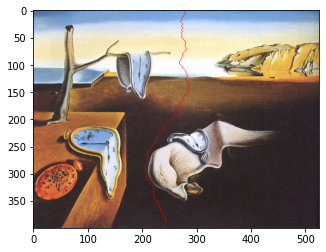

In [19]:
#mostrando um exemplo de seam que sera cortado

printMinSeam(img,minEnergyPath)

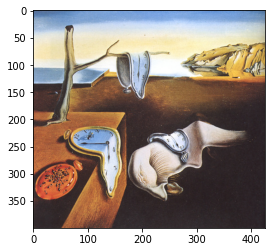

In [10]:
#ele ira calcular isso para cada seam que for remover, rodando o algoritmo para remover 400 seams dessa imagem temos

newImg = removeNSeams(img,100)

plt.imshow(newImg)
plt.show()

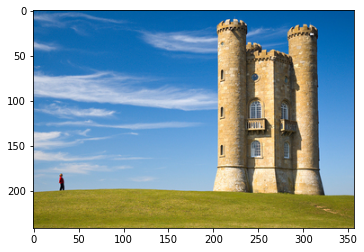

In [20]:
#agora fazendo a mesma coisa com outra imagem

img = imageio.imread('imgs/broadwayLowRes.jpg')

plt.imshow(img)
plt.show()

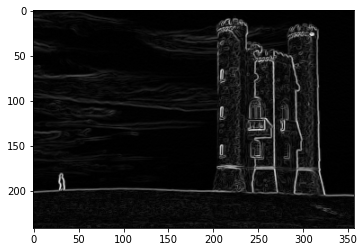

In [21]:
edgedImg = edgeImg(img)

plt.imshow(edgedImg, cmap='gray')
plt.show()

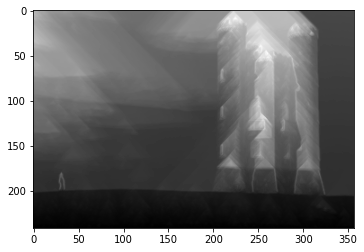

In [22]:
minEnergyPath = calculateMinEnergyPath(edgedImg)

plt.imshow(minEnergyPath, cmap='gray')
plt.show()

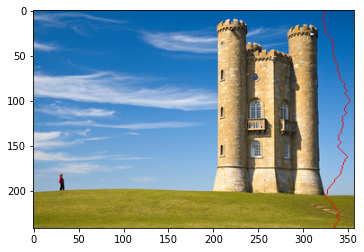

In [23]:
printMinSeam(img,minEnergyPath)

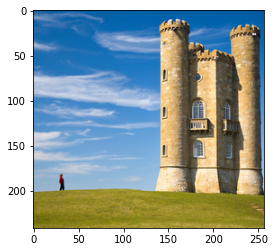

In [14]:
newImg = removeNSeams(img,100)

plt.imshow(newImg)
plt.show()